# EDA

# Exploratory Data Analysis
Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns, to spot anomalies, to test hypothesis and to check assumptions with the help of summary statistics and graphical representations. There are three types of EDA:<br>
1. Univariate Analysis<br>
2. Bivariate Analysis<br>
3. Multivariate Analysis<br>

Each of these will be explained in detail below



<a class="list-group-item list-group-item-action" data-toggle="list" href="#Notebook-Content" role="tab" aria-controls="settings">Go to top<span class="badge badge-primary badge-pill"></span></a> 

## Load the requred Libraries and Dataset

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
from statsmodels.formula.api import ols
from IPython.display import Image


The dataset can be downloaded from the link given below:<br>
https://www.kaggle.com/toramky/automobile-dataset

In [2]:
#import dataset
auto_mobile = pd.read_csv('Automobile_data.csv')
auto_mobile.head(2)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500


In [3]:
#Getting the data types of the dataset
auto_mobile.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [4]:
#Getting the Statistics of the Data
auto_mobile.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [5]:
#Finding out if there are Null value
auto_mobile.isna().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

<a class="list-group-item list-group-item-action" data-toggle="list" href="#Notebook-Content" role="tab" aria-controls="settings">Go to top<span class="badge badge-primary badge-pill"></span></a> 

## Data Cleaning

If we view thw data we will be able to see a few '?' entries instead of real values. So we ave to remove such anomalies. Hence, next we have to clean the columns of the data:

In [6]:
#Cleaning normalized-losses
# Find out number of records having '?' value for normalized losses
auto_mobile['normalized-losses'].loc[auto_mobile['normalized-losses'] == '?'].count()

41

In [7]:
# Setting the missing value to mean of normalized losses and conver the datatype to integer
nl = auto_mobile['normalized-losses'].loc[auto_mobile['normalized-losses'] != '?']
nlmean = nl.astype(str).astype(int).mean()
auto_mobile['normalized-losses'] = auto_mobile['normalized-losses'].replace('?',nlmean).astype(int)
auto_mobile['normalized-losses'].head()

0    122
1    122
2    122
3    164
4    164
Name: normalized-losses, dtype: int32

In [8]:
#Cleaning price data: a. Checking if there are non numeric values
#Find out the number of values which are not numeric
auto_mobile['price'].str.isnumeric().value_counts()

True     201
False      4
Name: price, dtype: int64

In [9]:
# List out the values which are not numeric
auto_mobile['price'].loc[auto_mobile['price'].str.isnumeric() == False]

9      ?
44     ?
45     ?
129    ?
Name: price, dtype: object

In [10]:
#Setting the missing value to mean of price and convert the datatype to integer
price = auto_mobile['price'].loc[auto_mobile['price'] != '?']
pmean = price.astype(str).astype(int).mean()
auto_mobile['price'] = auto_mobile['price'].replace('?',pmean).astype(int)
auto_mobile['price'].head()

0    13495
1    16500
2    16500
3    13950
4    17450
Name: price, dtype: int32

In [11]:
#Cleaning the horsepower data: a. Checking if there are non numeric values
#                              b. Checking if any value is greater than 10000
#Checking the numberic and replacing with mean value and conver the datatype to integer
auto_mobile['horsepower'].str.isnumeric().value_counts()
horsepower = auto_mobile['horsepower'].loc[auto_mobile['horsepower'] != '?']
hpmean = horsepower.astype(str).astype(int).mean()
auto_mobile['horsepower'] = auto_mobile['horsepower'].replace('?',pmean).astype(int)

In [12]:
#Checking the outlier of horsepower
auto_mobile.loc[auto_mobile['horsepower'] > 10000]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
130,0,122,renault,gas,std,four,wagon,fwd,front,96.1,...,132,mpfi,3.46,3.9,8.7,13207,?,23,31,9295
131,2,122,renault,gas,std,two,hatchback,fwd,front,96.1,...,132,mpfi,3.46,3.9,8.7,13207,?,23,31,9895


In [13]:
#Excluding the outlier data for horsepower
auto_mobile[np.abs(auto_mobile.horsepower-auto_mobile.horsepower.mean())<=(3*auto_mobile.horsepower.std())]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


<a class="list-group-item list-group-item-action" data-toggle="list" href="#Notebook-Content" role="tab" aria-controls="settings">Go to top<span class="badge badge-primary badge-pill"></span></a> 

In [14]:
#Cleaning the bore: a. Find if any values are invalid(?)
# Find out the number of invalid value
auto_mobile['bore'].loc[auto_mobile['bore'] == '?']

55    ?
56    ?
57    ?
58    ?
Name: bore, dtype: object

In [15]:
# Replace the non-numeric value to null and conver the datatype
auto_mobile['bore'] = pd.to_numeric(auto_mobile['bore'],errors='coerce')
auto_mobile.dtypes

symboling              int64
normalized-losses      int32
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke                object
compression-ratio    float64
horsepower             int32
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                  int32
dtype: object

In [16]:
#Cleaning the stroke
# Replace the non-number value to null and convert the datatype
auto_mobile['stroke'] = pd.to_numeric(auto_mobile['stroke'],errors='coerce')
auto_mobile.dtypes

symboling              int64
normalized-losses      int32
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int32
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                  int32
dtype: object

In [17]:
#Checking the peak rpm data
# Convert the non-numeric data to null and convert the datatype
auto_mobile['peak-rpm'] = pd.to_numeric(auto_mobile['peak-rpm'],errors='coerce')
auto_mobile.dtypes

symboling              int64
normalized-losses      int32
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int32
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                  int32
dtype: object

In [18]:
#Cleaning athe number of doors data
# remove the records which are having the value '?'
auto_mobile['num-of-doors'].loc[auto_mobile['num-of-doors'] == '?']
auto_mobile = auto_mobile[auto_mobile['num-of-doors'] != '?']
auto_mobile['num-of-doors'].loc[auto_mobile['num-of-doors'] == '?']

Series([], Name: num-of-doors, dtype: object)

Save the clean dataset

In [19]:
# auto_mobile.to_csv('auto_mobile.csv')

<a class="list-group-item list-group-item-action" data-toggle="list" href="#Notebook-Content" role="tab" aria-controls="settings">Go to top<span class="badge badge-primary badge-pill"></span></a> 

# UNIVARIATE ANALYSIS 

1. Univariate analysis explores variables (attributes) one by one <br>
2. Variables could be either categorical or numerical <br>
3. There are different statistical and visualization techniques of investigation for each type of variable <br>
4. Numerical variables can be transformed into categorical counterparts by a process called binning or discretization It is also possible to transform a categorical variable into its numerical counterpart by a process called encoding <br>
<br>**Univariate Analysis** can be further classified in broad the category 
1. Categorical
2. Numerical



### Categorical Variables
A categorical or discrete variable is one that has two or more categories (values). There are two types of categorical variable, nominal and ordinal.  A nominal variable has no intrinsic ordering to its categories. For example, gender is a categorical variable having two categories (male and female) with no intrinsic ordering to the categories. An ordinal variable has a clear ordering. For example, temperature as a variable with three orderly categories (low, medium and high)<br>A frequency table is a way of counting how often each category of the variable in question occurs. It may be enhanced by the addition of percentages that fall into each category<br>

|Statistics|Visualization|Description|
|----------|-------------|-----------|
|Count|Bar Chart|The number of values of the specified variable|
|Count%|Pie Chart|The percentage of values of the specified variable|



<a class="list-group-item list-group-item-action" data-toggle="list" href="#Notebook-Content" role="tab" aria-controls="settings">Go to top<span class="badge badge-primary badge-pill"></span></a> 

### Pie Chart
1. A pie chart is a circular statistical diagram<br>
2. The area of the whole chart represents 100% or the whole of the data<br>
3. The areas of the pies present in the Pie chart represent the percentage of parts of data<br>
4. The parts of a pie chart are called wedges<br>
5. The length of the arc of a wedge determines the area of a wedge in a pie chart<br>
6. The area of the wedges determines the relative quantum or percentage of a part with respect to a whole<br>
7. Pie charts are frequently used in business presentations as they give quick summary of the business activities like sales, operations and so on<br>
8. Pie charts are also used heavily in survey results, news articles, resource usage diagrams like disk and memory<br>

In [20]:
auto_mobile['body-style'].unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

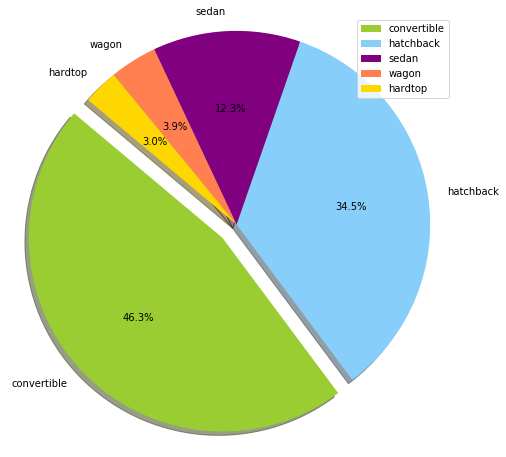

In [21]:
## pie chart can be made to find the percentage of each species
labels = list(auto_mobile['body-style'].unique())
sizes = list(auto_mobile['body-style'].value_counts())
colors = ['yellowgreen', 'lightskyblue', 'purple','coral','gold']
explode = (0.1, 0, 0, 0, 0)  # explode 1st slice
fig = plt.figure(figsize = (8,8)) 

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.legend(labels, loc="best")

plt.axis('equal')
plt.show()

In [22]:
print(sizes)

[94, 70, 25, 8, 6]


From the pie chart we can visualize the percentage of each bode style of automobiles<br><br>


<a class="list-group-item list-group-item-action" data-toggle="list" href="#EDA" role="tab" aria-controls="settings">Go to top<span class="badge badge-primary badge-pill"></span></a> 


###  Bar Plot
A bar chart or bar graph is a chart or graph that presents categorical data with rectangular bars with heights or lengths proportional to the values that they represent<br>

The bars can be plotted vertically or horizontally<br>

A bar graph shows comparisons among discrete categories. One axis of the chart shows the specific categories being compared, and the other axis represents a measured value

In [23]:
#make dataframe for plotting
d = auto_mobile.make.value_counts().to_frame().reset_index() 
  
# Set the index 
d.columns = ['Make','count']
d



,Make,count
0,toyota,32
1,nissan,18
2,mazda,16
3,honda,13
4,mitsubishi,13
5,volkswagen,12
6,subaru,12
7,peugot,11
8,volvo,11
9,dodge,8


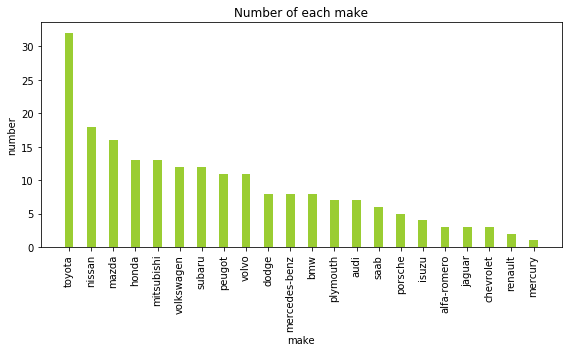

In [24]:
labels = d.Make.tolist()
y_pos = labels
sizes = d['count'].tolist()
fig = plt.figure(figsize = (8,5)) 
#plot

plt.bar(y_pos, sizes, align='center', alpha=1, width=0.4, color='yellowgreen')
plt.xticks(y_pos, labels, rotation ='vertical')
plt.xlabel('make')
plt.ylabel('number')
plt.title('Number of each make')

plt.tight_layout()
plt.show()

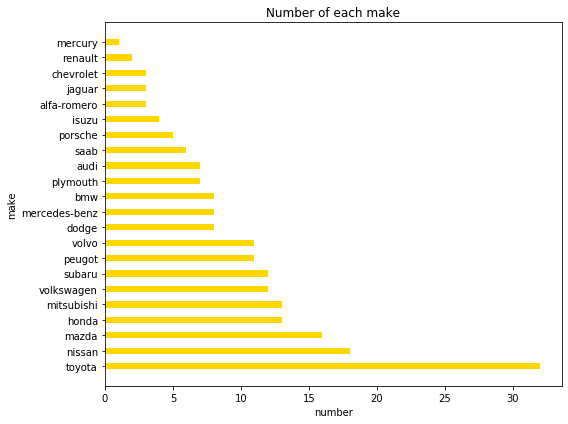

In [25]:
#for horizontal bar plots
labels = d.Make.tolist()
y_pos = labels
sizes = d['count'].tolist()
fig = plt.figure(figsize = (8,6)) 
#plot
plt.barh(y_pos, sizes, align='center', alpha=1, height=0.4, color='gold')
plt.yticks(y_pos, labels)
plt.xlabel('number')
plt.ylabel('make')
plt.title('Number of each make')

plt.tight_layout()
plt.show()

From the two histograms we get a count of the number of cars present in each category of body style

<a class="list-group-item list-group-item-action" data-toggle="list" href="#EDA" role="tab" aria-controls="settings">Go to top<span class="badge badge-primary badge-pill"></span></a> 


### Frequency Table

We can make a table to check the count of each category in a particular column of the data<br>
We can also see the percentage of data in each category

In [26]:
#for frequency table
df = pd.DataFrame()
df = pd.value_counts(auto_mobile.make).to_frame()
total = df.make.sum()
df['percentage(%) of make']=(df['make']/total)*100 
df

,make,percentage(%) of make
toyota,32,15.763547
nissan,18,8.866995
mazda,16,7.881773
honda,13,6.403941
mitsubishi,13,6.403941
volkswagen,12,5.911330
subaru,12,5.911330
peugot,11,5.418719
volvo,11,5.418719
dodge,8,3.940887


From the table above it can be said that toyota makes the highest and mercury makes the lowest number of cars. Similarly we can make such tables for all the categorical variables

<a class="list-group-item list-group-item-action" data-toggle="list" href="#Notebook-Content" role="tab" aria-controls="settings">Go to top<span class="badge badge-primary badge-pill"></span></a> 

### Numerical Variables
A numerical or continuous variable (attribute) is one that may take on any value within a finite or infinite interval (e.g., height, weight, temperature, blood glucose, ...)<br>

There are two types of numerical variables, interval and ratio. An interval variable has values whose differences are interpretable, but it does not have a true zero. A good example is temperature in Centigrade degrees. Data on an interval scale can be added and subtracted but cannot be meaningfully multiplied or divided. For example, we cannot say that one day is twice as hot as another day. In contrast, a ratio variable has values with a true zero and can be added, subtracted, multiplied or divided (e.g., weight)<br>

|Statistics|Visualization|Description|
|----------|-------------|-----------|
|Count|Histogram|The number of observations of the variable|
|Minimum|Box Plot|The smallest value of the variable|
|Maximum|Box Plot|The largest value of the variable|
|Mean|Box Plot|The sum of the values divided by the count|
|Median|Box Plot|The middle value|
|Mode|Histogram|The most frequent value|
|Quantile|Box Plot|A set of 'cut points' that divide a set of data into groups containing equal numbers of values|
|Range|Box Plot|The difference between maximum and minimum|
|Variance|Histogram|A measure of data dispersion|
|Standard Deviation|Histogram|The square root of variance|
|Coefficient of Deviation|Histogram|A measure of data dispersion divided by mean|
|Skewness|Histogram|A measure of symmetry or asymmetry in the distribution of data|
|Kurtosis|Histogram|A measure of whether the data are peaked or flat relative to a normal distribution|



<a class="list-group-item list-group-item-action" data-toggle="list" href="#EDA" role="tab" aria-controls="settings">Go to top<span class="badge badge-primary badge-pill"></span></a> 


### Histograms
The purpose of a histogram is to graphically summarize the distribution of a univariate data set<br><br>
_The histogram graphically shows the following:_ centre  (i.e., the location) of the data, spread (i.e., the scale) of the data, skewness of the data, presence of outliers, presence of multiple modes in the data<br>
The most common form of the histogram is obtained by splitting the range of the data into equal-sized bins (called classes). Then for each bin, the number of points from the data set that fall into each bin are counted. That is;<br>
Vertical axis: Frequency (i.e., counts for each bin) <br>
Horizontal axis: Response variable <br>

_The histogram can be used to answer the following questions:_ <br>
1. What kind of population distribution do the data come from<br>
2. Where are the data located<br>
3. How spread out are the data<br>
4. Are the data symmetric or skewed<br> 
5. Are there outliers in the data<br>
The code to plot a histogram has been given below:

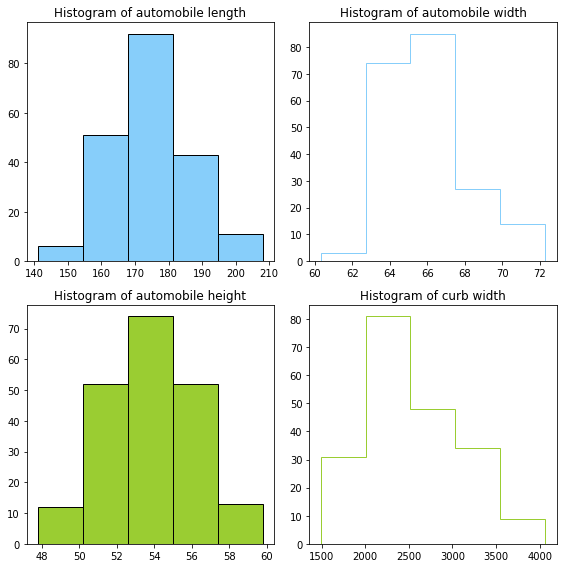

In [27]:
l = auto_mobile.length
w = auto_mobile.width
h = auto_mobile.height
cw = auto_mobile['curb-weight']
fig = plt.figure(figsize = (8,8)) 
#adding subplots
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)
#plot

#plot of length
ax1.hist(l,bins=5, histtype='bar', align='mid', alpha= 1, color='lightskyblue', label='length data', edgecolor='black')
ax1.set_title('Histogram of automobile length')

#plot of width
ax2.hist(w,5, histtype='step', align='mid', alpha= 1, color='gold', label='width data', edgecolor='lightskyblue')
ax2.set_title('Histogram of automobile width')

#plot of weight
ax3.hist(h,5, histtype='bar', align='mid', alpha= 1, color='yellowgreen', label='height data', edgecolor='black')
ax3.set_title('Histogram of automobile height')

#plot of curb width
ax4.hist(cw,5, histtype='step', align='mid', alpha= 1, color='lightskyblue', label='curb width data', edgecolor='yellowgreen')
ax4.set_title('Histogram of curb width')

plt.tight_layout()
plt.show()

The variables have been divided into 5 equal bins and the frequency in each of the bins can be seen. From the histogram above we can say that here are 70 cars with height 54 inch. This is just and interpretation example Now, if we wish to see the distribution of a variable, say length, for each type of body-style, then there are two ways to do it which have described below.

<a class="list-group-item list-group-item-action" data-toggle="list" href="#EDA" role="tab" aria-controls="settings">Go to top<span class="badge badge-primary badge-pill"></span></a> 


### Density Plot
A density plot is a smoothed, continuous version of a histogram estimated from the data<br>

The x-axis is the value of the variable just like in a histogram. The y-axis in a density plot is the probability density function for the kernel density estimation. However, we need to be careful to specify this is a probability density and not a probability. The difference is the probability density is the probability per unit on the x-axis. To convert to an actual probability, we need to find the area under the curve for a specific interval on the x-axis<br>

Because this is a probability density and not a probability, the y-axis can take values greater than one. The only requirement of the density plot is that the total area under the curve integrates to one<br>

Think of the y-axis on a density plot as a value only for relative comparisons between different categories

The code to make a density plot is given below:

Text(0, 0.5, 'probability density')

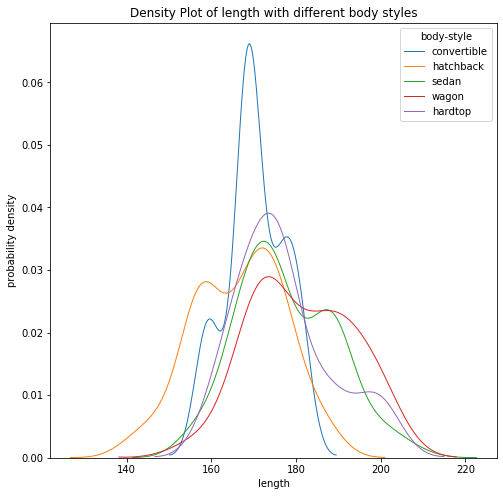

In [28]:
# List of three species to plot
body_style = auto_mobile['body-style'].unique()
fig = plt.figure(figsize = (8,8)) 
# Iterate through the five body types
for i in body_style:
    subset = auto_mobile[auto_mobile['body-style'] == i]
# Draw the density plot
    sns.distplot(subset['length'], hist = False, kde = True,
                 kde_kws = {'linewidth': 1},
                 label = i)
# Plot formatting
plt.legend(prop={'size': 10}, title = 'body-style')
plt.title('Density Plot of length with different body styles')
plt.xlabel('length')
plt.ylabel('probability density')

Hence from the plot above we can make a comparison of the distributions of length for the different styles of cars. Similarly, we can also make a histogram and density plot for visualization; the code for which is given below

In [29]:
auto_mobile['body-style'].unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

<a class="list-group-item list-group-item-action" data-toggle="list" href="#Notebook-Content" role="tab" aria-controls="settings">Go to top<span class="badge badge-primary badge-pill"></span></a> 

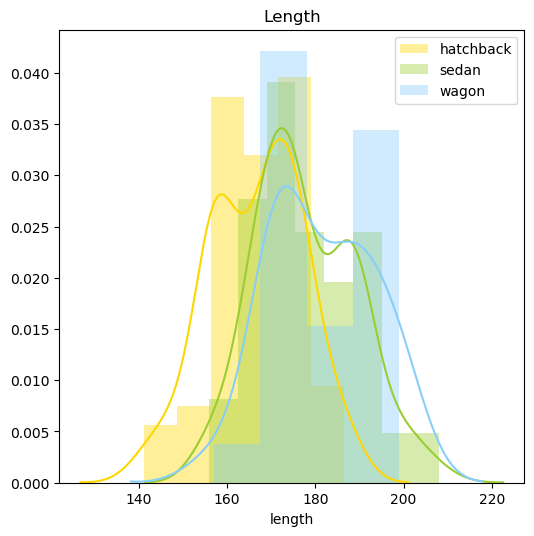

In [30]:
#Histogram and density plot 
plt.subplots(figsize=(6,6), dpi=100)
sns.distplot( auto_mobile.loc[auto_mobile['body-style']=='hatchback', "length"] , color="gold", label="hatchback")
sns.distplot( auto_mobile.loc[auto_mobile['body-style']=='sedan', "length"] , color="yellowgreen", label="sedan")
sns.distplot( auto_mobile.loc[auto_mobile['body-style']=='wagon', "length"] , color="lightskyblue", label="wagon")

plt.title('Length')
plt.legend();

<a class="list-group-item list-group-item-action" data-toggle="list" href="#Notebook-Content" role="tab" aria-controls="settings">Go to top<span class="badge badge-primary badge-pill"></span></a> 

### Boxplot
When we display the data distribution in a standardized way using 5 summary – minimum, Q1 (First Quartile), median, Q3(third Quartile), and maximum, it is called a Box plot<br>

It is also termed as box and whisker plot when the lines extending from the boxes indicate variability outside the upper and lower quartiles<br>

Outliers can be plotted as unique points.<br>
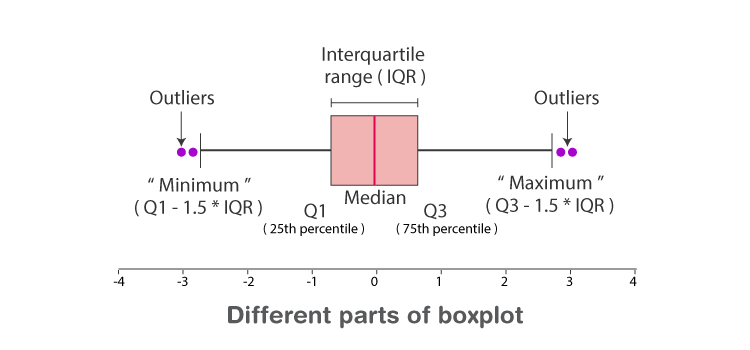
<br>

**Application of Boxplot:**
It is used to know:<br>
1. The outliers and its values<br>
2. Symmetry of Data<br>
3. Tight grouping of data<br>
4. Data skewness -if, in which direction and how<br>

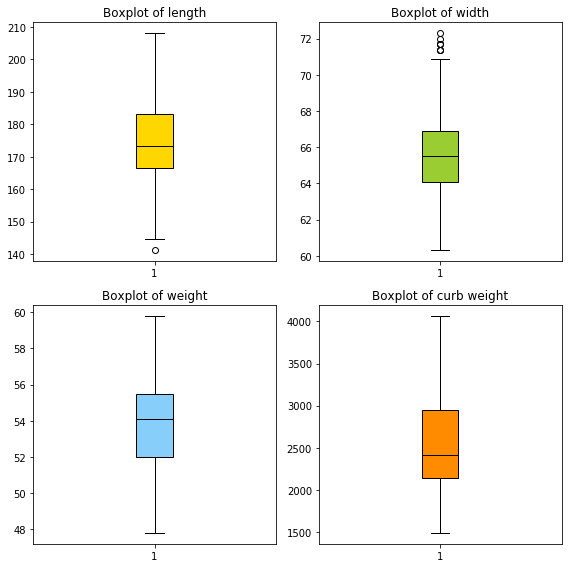

In [31]:
l = auto_mobile.length
w = auto_mobile.width
h = auto_mobile.height
cw = auto_mobile['curb-weight']
fig = plt.figure(figsize = (8,8))
#adding subplots
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)
#plot

#boxplot of length
ax1.boxplot(l,notch=False, patch_artist=True,
            boxprops=dict(facecolor='gold', color='black'),
            capprops=dict(color='black'),
            whiskerprops=dict(color='black'),
            flierprops=dict(color='black', markeredgecolor='black'),
            medianprops=dict(color='black'))
ax1.set_title('Boxplot of length')

#boxplot of width
ax2.boxplot(w,notch=False, patch_artist=True,
            boxprops=dict(facecolor='yellowgreen', color='black'),
            capprops=dict(color='black'),
            whiskerprops=dict(color='black'),
            flierprops=dict(color='black', markeredgecolor='black'),
            medianprops=dict(color='black'))
ax2.set_title('Boxplot of width')

#boxplot hist of height
ax3.boxplot(h,notch=False, patch_artist=True,
            boxprops=dict(facecolor='lightskyblue', color='black'),
            capprops=dict(color='black'),
            whiskerprops=dict(color='black'),
            flierprops=dict(color='black', markeredgecolor='black'),
            medianprops=dict(color='black'))
ax3.set_title('Boxplot of weight')

#boxplot hist of crub weight
ax4.boxplot(cw,notch=False, patch_artist=True,
            boxprops=dict(facecolor='darkorange', color='black'),
            capprops=dict(color='black'),
            whiskerprops=dict(color='black'),
            flierprops=dict(color='black', markeredgecolor='black'),
            medianprops=dict(color='black'))
ax4.set_title('Boxplot of curb weight')

plt.tight_layout()
plt.show()

The statistics that can be used for univariate analysis of numerical data can be checked in a table by using the function below:

<a class="list-group-item list-group-item-action" data-toggle="list" href="#Notebook-Content" role="tab" aria-controls="settings">Go to top<span class="badge badge-primary badge-pill"></span></a> 


### Table
Using the function  given below, we can make a table to show all the statistics that are used in bivariate analysis. Please note that using df.describe() also gives us a table of similar structure but would not include values for some statistics like skewness, variance, etc.

In [32]:
from scipy import stats
import statistics
def univariate_numerical(data):
    df=pd.DataFrame()
    df['Count']=data.count()
    df['Minimum']=data.min()
    df['Maximum']=data.max()
    df['Mean']=data.mean()
    df['Median']=data.median()
    df['Variance']=data.var()
    df['Standard Deviation']=data.std()
    df['Skewness']=data.skew()
    df['Kurtosis']=data.kurtosis()
    return df

In [33]:
df=univariate_numerical(auto_mobile)

In [34]:
df

,Count,Minimum,Maximum,Mean,Median,Variance,Standard Deviation,Skewness,Kurtosis
symboling,203,-2,3,0.837438,1.00,1.562552e+00,1.250021,0.204275,-0.691709
normalized-losses,203,65,256,121.871921,122.00,1.010261e+03,31.784599,0.864408,1.403077
make,203,alfa-romero,volvo,NaN,NaN,NaN,NaN,NaN,NaN
fuel-type,203,diesel,gas,NaN,NaN,NaN,NaN,NaN,NaN
aspiration,203,std,turbo,NaN,NaN,NaN,NaN,NaN,NaN
num-of-doors,203,four,two,NaN,NaN,NaN,NaN,NaN,NaN
body-style,203,convertible,wagon,NaN,NaN,NaN,NaN,NaN,NaN
drive-wheels,203,4wd,rwd,NaN,NaN,NaN,NaN,NaN,NaN
engine-location,203,front,rear,NaN,NaN,NaN,NaN,NaN,NaN
wheel-base,203,86.6,120.9,98.781281,97.00,3.649361e+01,6.040994,1.041170,0.986065


<a class="list-group-item list-group-item-action" data-toggle="list" href="#EDA" role="tab" aria-controls="settings">Go to top<span class="badge badge-primary badge-pill"></span></a> 

# Bivariate analysis
Bivariate performed to find the relationship between each variable in the dataset and the target variable of interest (or) using 2 variables and finding relationship  between them. Ex:-Box plot, Violin plot.

**Bivariate Analysis** can be further classified in broad the category 
1. Numerical- Numerical
2. Categorical- Categorical 
3. Numerical- Categorical 


## Numerical- Numerical

In this the relationship between the Numerical variables is studied by plotting various plot such as scatter plot, violin plot

### Scatter plot
A scatter plot (aka scatter chart, scatter graph) uses dots to represent values for two different numeric variables. The position of each dot on the horizontal and vertical axis indicates values for an individual data point. Scatter plots are used to observe relationships between variables.

**When you should use a scatter plot** Scatter plots’ primary uses are to observe and show relationships between two numeric variables. The dots in a scatter plot not only report the values of individual data points, but also patterns when the data are taken as a whole.

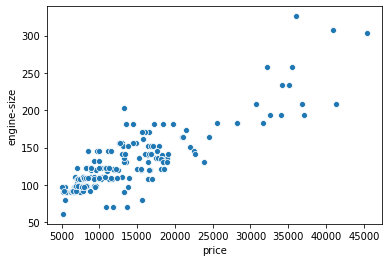

In [35]:
# Scatter plot using Seaborn
# Findings: The more the engine size the costlier the price is
ax = sns.scatterplot(x="price", y="engine-size", data=auto_mobile)

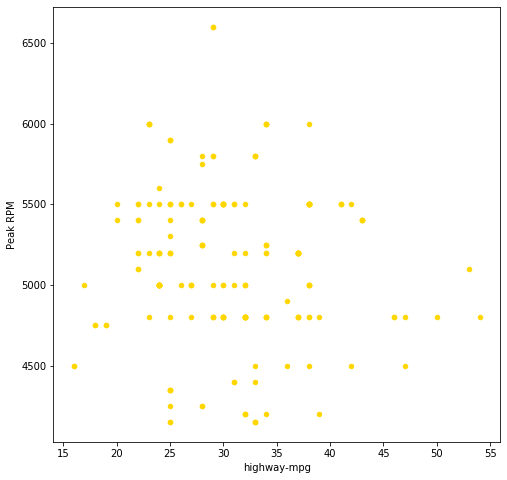

In [36]:
# Scatter plot using pandas
ax1 = auto_mobile.plot.scatter(x='highway-mpg',
                      y='peak-rpm',
                      c='gold', figsize = (8,8))
plt.xlabel('highway-mpg') 
plt.ylabel('Peak RPM')
plt.show()

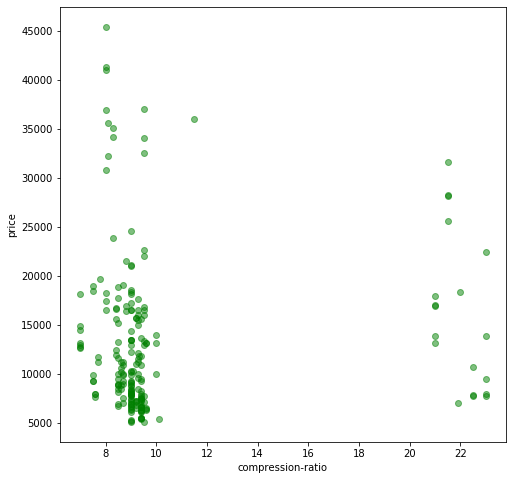

In [37]:
fig = plt.figure(figsize = (8,8)) 
# Scatter plot using Matplotlib
plt.scatter(auto_mobile['compression-ratio'], auto_mobile['price'], alpha=0.5, c='g')
# plt.title('Scatter plot pythonspot.com')
plt.xlabel('compression-ratio')
plt.ylabel('price')
plt.show()

Text(0, 0.5, 'Peak RPM')

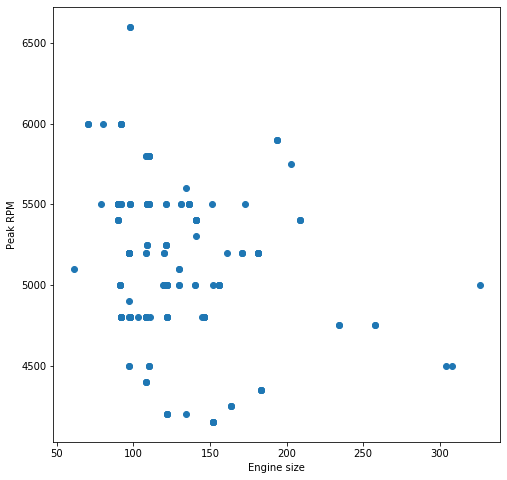

In [38]:
fig = plt.figure(figsize = (8,8)) 
#plot
plt.scatter(auto_mobile['engine-size'],auto_mobile['peak-rpm'])
plt.xlabel('Engine size')
plt.ylabel('Peak RPM')

<a class="list-group-item list-group-item-action" data-toggle="list" href="#EDA" role="tab" aria-controls="settings">Go to top<span class="badge badge-primary badge-pill"></span></a> 


## Categorical-Numerical

### Bar Plots
Bar plot for categorical and Numerical 

Text(0.5, 0, 'Drive wheels')

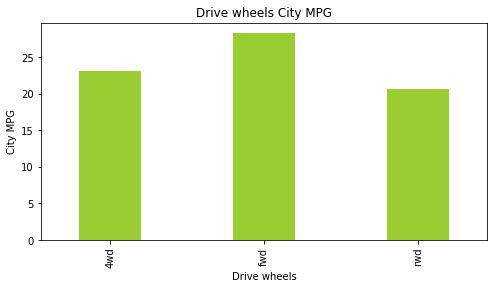

In [39]:
fig = plt.figure(figsize = (8,4)) 
#plot
auto_mobile.groupby('drive-wheels')['city-mpg'].mean().plot(kind='bar', align='center', alpha=1, width=0.4, color='yellowgreen')
plt.title("Drive wheels City MPG")
plt.ylabel('City MPG')
plt.xlabel('Drive wheels')

Text(0.5, 0, 'Drive wheels')

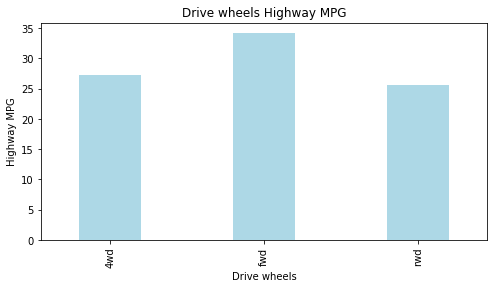

In [40]:
fig = plt.figure(figsize = (8,4)) 
#plot
auto_mobile.groupby('drive-wheels')['highway-mpg'].mean().plot(kind='bar', align='center', alpha=1, width=0.4, color='lightblue');
plt.title("Drive wheels Highway MPG")
plt.ylabel('Highway MPG')
plt.xlabel('Drive wheels')

In [41]:
auto_mobile['num-of-cylinders'].value_counts()

four      157
six        24
five       11
eight       5
two         4
twelve      1
three       1
Name: num-of-cylinders, dtype: int64

<a class="list-group-item list-group-item-action" data-toggle="list" href="#Notebook-Content" role="tab" aria-controls="settings">Go to top<span class="badge badge-primary badge-pill"></span></a> 

### Box Plot
Box Plot for bivariate analysis

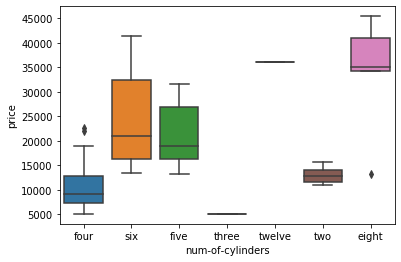

In [42]:
# From here we can see the outlier with respect to our dependent variable 
# plt.rcParams['figure.figsize']=(8,8)
ax = sns.boxplot(x="num-of-cylinders", y="price", data=auto_mobile)

<a class="list-group-item list-group-item-action" data-toggle="list" href="#EDA" role="tab" aria-controls="settings">Go to top<span class="badge badge-primary badge-pill"></span></a> 


## Categorical-Categorical

### CrossTab
Here we can see the relation  between the categorical variables and its distribution 

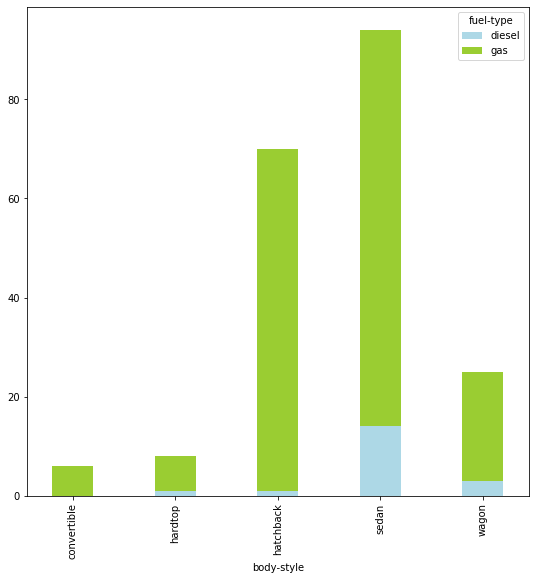

In [43]:
fig = pd.crosstab(auto_mobile['body-style'], auto_mobile['fuel-type']).plot(kind='bar', stacked=True, width = 0.4, figsize = (9,9), color=['lightblue','yellowgreen'])

<a class="list-group-item list-group-item-action" data-toggle="list" href="#EDA" role="tab" aria-controls="settings">Go to top<span class="badge badge-primary badge-pill"></span></a> 


### Z-Test

A Z-test is a type of hypothesis test. Hypothesis testing is just a way for you to figure out if results from a test are valid or repeatable.
<bR>For example, if someone said they had found a new drug that cures cancer, you would want to be sure it was probably true. A hypothesis test will tell you if it is probably true, or probably not true. A Z-test, is used when your data is approximately normally distributed.
When you can run a Z Test.

<Br>Several different types of tests are used in statistics (i.e. f test, chi square test, t test). You would use a Z test if

1. Your sample size is greater than 30. Otherwise, use a t test
2. Data points should be independent from each other. In other words, one data point isn’t related or doesn’t affect another data point
3. Your data should be normally distributed. However, for large sample sizes (over 30) this does not always matter
4. Your data should be randomly selected from a population, where each item has an equal chance of being selected. Sample sizes should be equal if at all possible

Interpretation depends on hypothesis, if P-Value is less than 0.05 then we must reject the null hypothesis

The Test Statistic: When our sample is taken from a normal distribution with known variance, then our test statistic is:


In [44]:
import pandas as pd
from scipy import stats
from statsmodels.stats import weightstats as stests
ztest ,pval = stests.ztest(auto_mobile['highway-mpg'])
print((pval))
ztest ,pval1 = stests.ztest(auto_mobile['highway-mpg'], x2=auto_mobile['price'], value=0,alternative='two-sided')
print((pval1))

0.0
1.6397793293167021e-125


<a class="list-group-item list-group-item-action" data-toggle="list" href="#Notebook-Content" role="tab" aria-controls="settings">Go to top<span class="badge badge-primary badge-pill"></span></a> 


### T-Test

The t test tells you how significant the differences between groups are; In other words it lets you know if those differences (measured in means/averages) could have happened by chance.

In the T-test, we want to measure if two samples are different from one another. One of these samples could be the population, however, we use a T-test in place of a Z-test if the population’s standard deviation is unknown.
There are a lot of similar assumptions to the Z-test. The sample must be random and independently selected as well as drawn from the normal distribution. The values should also be numeric and continuous. The sample size does not necessarily have to be large.

<br>Interpretation depends on hypothesis, if P-Value is less than 0.05 then we must reject the null hypothesis

x̄1 is the mean of first data set<br>
x̄2 is the mean of second data set<br>
S12 is the standard deviation of first data set<br>
S22 is the standard deviation of second data set<br>
N1 is the number of elements in the first data set<br>
N2 is the number of elements in the second data set<br>

In [45]:
# sample up wind
x1 = [10.8, 10.0, 8.2, 9.9, 11.6, 10.1, 11.3, 10.3, 10.7, 9.7, 
      7.8, 9.6, 9.7, 11.6, 10.3, 9.8, 12.3, 11.0, 10.4, 10.4]

# sample down wind
x2 = [7.8, 7.5, 9.5, 11.7, 8.1, 8.8, 8.8, 7.7, 9.7, 7.0, 
      9.0, 9.7, 11.3, 8.7, 8.8, 10.9, 10.3, 9.6, 8.4, 6.6,
      7.2, 7.6, 11.5, 6.6, 8.6, 10.5, 8.4, 8.5, 10.2, 9.2]

# equal sample size and assume equal population variance
t_critical = 1.677
N1 = len(x1)
N2 = len(x2)
d1 = N1-1
d2 = N2-1
df = d1+d2
s1 = np.std(x1,ddof=1)
s2 = np.std(x2,ddof=1)
x1_bar = np.mean(x1)
x2_bar = np.mean(x2)

sp = np.sqrt((d1*s1**2 + d2*s2**2)/df)
se = sp*np.sqrt(1/N1 + 1/N2)
t = (x2_bar - x1_bar)/(se)
print("t-statistic", t)
# a two-sample independent t-test is done with scipy as follows
# NOTE: the p-value given is two-sided so the one-sided p value would be p/2
t, p_twosided = stats.ttest_ind(x2, x1, equal_var=True)
print("t = ",t, ", p_twosided = ", p_twosided, ", p_onesided =", p_twosided/2)

t-statistic -3.5981947686898033
t =  -3.5981947686898033 , p_twosided =  0.0007560337478801464 , p_onesided = 0.0003780168739400732


<a class="list-group-item list-group-item-action" data-toggle="list" href="#EDA" role="tab" aria-controls="settings">Go to top<span class="badge badge-primary badge-pill"></span></a> 


### Chi-Square Tests

The chi-square statistical test for numerical variables  is used to determine whether there is a significant difference between an expected distribution and an actual distribution. It is typically used with categorical data such as educational attainment, colours, or gender.

In [46]:
a1 = [6, 4, 5, 10]
a2 = [8, 5, 3, 3]
a3 = [5, 4, 8, 4]
a4 = [4, 11, 7, 13]
a5 = [5, 8, 7, 6]
a6 = [7, 3, 5, 9]
dice = np.array([a1, a2, a3, a4, a5, a6])

In [47]:
from scipy import stats

stats.chi2_contingency(dice)

(16.490612061288754,
 0.35021521809742745,
 15,
 array([[ 5.83333333,  5.83333333,  5.83333333,  7.5       ],
        [ 4.43333333,  4.43333333,  4.43333333,  5.7       ],
        [ 4.9       ,  4.9       ,  4.9       ,  6.3       ],
        [ 8.16666667,  8.16666667,  8.16666667, 10.5       ],
        [ 6.06666667,  6.06666667,  6.06666667,  7.8       ],
        [ 5.6       ,  5.6       ,  5.6       ,  7.2       ]]))

In [48]:
# interpretation of results 
chi2_stat, p_val, dof, ex = stats.chi2_contingency(dice)
print("Chi2 Stat          :",chi2_stat)
print("Degrees of Freedom :",dof)
print("P-Value            :",p_val)
print('\n')
print("Contingency Table  :\n",ex)


Chi2 Stat          : 16.490612061288754
Degrees of Freedom : 15
P-Value            : 0.35021521809742745


Contingency Table  :
 [[ 5.83333333  5.83333333  5.83333333  7.5       ]
 [ 4.43333333  4.43333333  4.43333333  5.7       ]
 [ 4.9         4.9         4.9         6.3       ]
 [ 8.16666667  8.16666667  8.16666667 10.5       ]
 [ 6.06666667  6.06666667  6.06666667  7.8       ]
 [ 5.6         5.6         5.6         7.2       ]]


**Chi Square for Categorical Vairbale**

In [49]:
gender = ['male','male','male','male', 'female','female','female','female','female']
Likes_shoping = ['No','Yes','Yes','Yes','Yes','Yes','No','No','No']
data = pd.DataFrame({'gender': gender, 'Likes_shoping':Likes_shoping})


In [50]:
#Contingency Table
contingency_table = pd.crosstab(data['gender'], data['Likes_shoping'])
print('contingency_table :',contingency_table)
print('\n')


print("===================================================")

#Observed Values
Observed_Values = contingency_table.values 
print("Observed Values :\n",Observed_Values)

# print("==========================================================================")

#Expected Values
import scipy.stats
b=scipy.stats.chi2_contingency(contingency_table)
Expected_Values = b[3]
print("\nExpected Values:\n ",Expected_Values)

# print("==========================================================================")

#Degree of Freedom
no_of_rows=len(contingency_table.iloc[0:2,0])
no_of_columns=len(contingency_table.iloc[0,0:2])
df=(no_of_rows-1)*(no_of_columns-1)
print("\nDegree of Freedom: ",df)

# print("==========================================================================")

#Significance Level 5%
alpha=0.05
#chi-square statistic - χ2
from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]
print("\nchi-square statistic  :",chi_square_statistic)

# print("==========================================================================")

#critical_value
critical_value=chi2.ppf(q=1-alpha,df=df)
print('\ncritical_value        :',critical_value)

# print("==========================================================================")

#p-value
p_value=1-chi2.cdf(x=chi_square_statistic,df=df)
print('\np-value               :',p_value)
print('Significance level    :',alpha)
print('Degree of Freedom     :',df)
print('chi-square statistic  :',chi_square_statistic)
print('critical_value        :',critical_value)
print('p-value               :',p_value)

print("===================================================")
#compare chi_square_statistic with critical_value and p-value which is the probability of getting chi-square>0.09 (chi_square_statistic)
if chi_square_statistic>=critical_value:
    print("\n Critical_Value: Reject H0,There is a relationship between 2 categorical variables")
else:
    print("\n Critical_Value: Retain H0,There is no relationship between 2 categorical variables")
    
if p_value<=alpha:
    print("\n p-value       : Retain H0,There is no relationship between 2 categorical variables")
else:
    print("\n p-value       : Retain H0,There is no relationship between 2 categorical variables")

contingency_table : Likes_shoping  No  Yes
gender                
female          3    2
male            1    3


Observed Values :
 [[3 2]
 [1 3]]

Expected Values:
  [[2.22222222 2.77777778]
 [1.77777778 2.22222222]]

Degree of Freedom:  1

chi-square statistic  : 1.1024999999999996

critical_value        : 3.841458820694124

p-value               : 0.29371811275179205
Significance level    : 0.05
Degree of Freedom     : 1
chi-square statistic  : 1.1024999999999996
critical_value        : 3.841458820694124
p-value               : 0.29371811275179205

 Critical_Value: Retain H0,There is no relationship between 2 categorical variables

 p-value       : Retain H0,There is no relationship between 2 categorical variables


<a class="list-group-item list-group-item-action" data-toggle="list" href="#EDA" role="tab" aria-controls="settings">Go to top<span class="badge badge-primary badge-pill"></span></a> 


# Multivariate Analysis

### Correlation

**Pearson’s Correlation Coefficient**
Pearson’s correlation coefficient is the test statistics that measures the statistical relationship, or association, between two continuous variables.  It is known as the best method of measuring the association between variables of interest because it is based on the method of covariance.  It gives information about the magnitude of the association, or correlation, as well as the direction of the relationship.

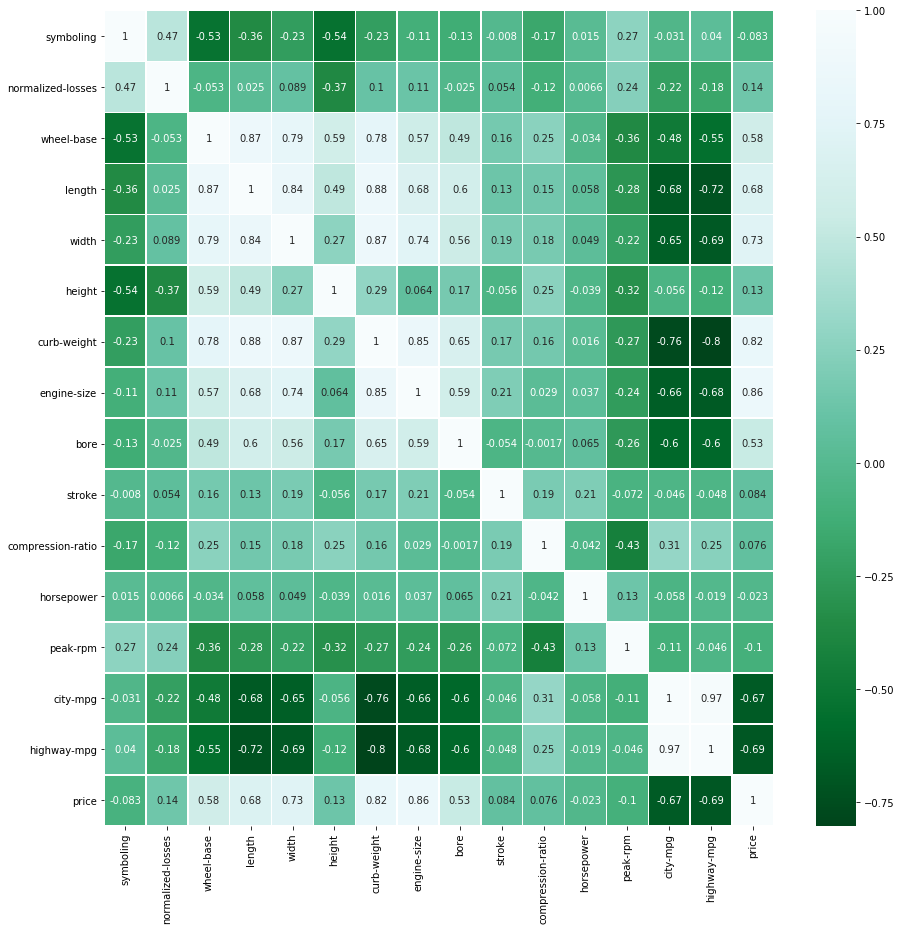

In [51]:
a = auto_mobile.corr()
plt.rcParams['figure.figsize']=(15,15)
ax = sns.heatmap(a, linewidth=0.5, cmap= 'BuGn_r', annot = True)
plt.show()

<a class="list-group-item list-group-item-action" data-toggle="list" href="#Notebook-Content" role="tab" aria-controls="settings">Go to top<span class="badge badge-primary badge-pill"></span></a> 


### Combination Chart
Its a combination of line and bar plot where time variable is involved, we can use

<Figure size 648x648 with 0 Axes>

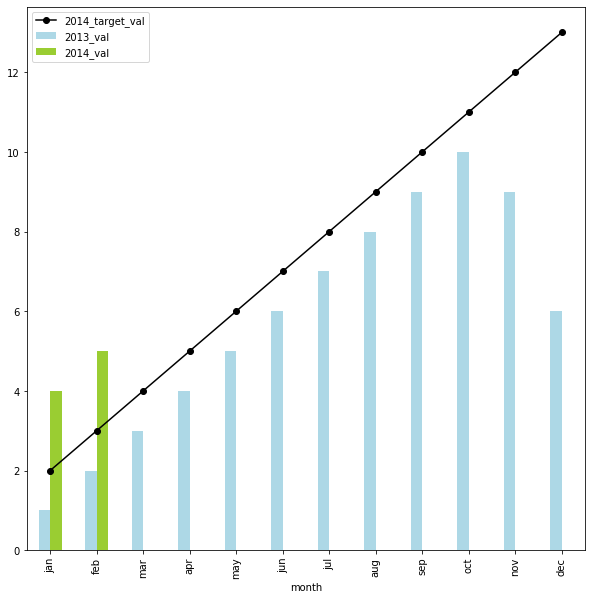

In [52]:
# combo char can be seen for nultiple vairable which depends on time example want to see the profit and sales over the period of time 
plt.rcParams['figure.figsize']=(10,10)
left_2013 = pd.DataFrame(
    {'month': ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep',
               'oct', 'nov', 'dec'],
     '2013_val': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 9, 6]})

right_2014 = pd.DataFrame({'month': ['jan', 'feb'], '2014_val': [4, 5]})

right_2014_target = pd.DataFrame(
    {'month': ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep',
               'oct', 'nov', 'dec'],
     '2014_target_val': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]})
fig = plt.figure(figsize = (9,9)) 
df_13_14 = pd.merge(left_2013, right_2014, how='outer')
df_13_14_target = pd.merge(df_13_14, right_2014_target, how='outer')

ax = df_13_14_target[['month', '2014_target_val']].plot(
    x='month', linestyle='-', marker='o', c='black')
df_13_14_target[['month', '2013_val', '2014_val']].plot(x='month', kind='bar',
                                                        ax=ax, color=['lightblue','yellowgreen'])


plt.show()

<a class="list-group-item list-group-item-action" data-toggle="list" href="#Notebook-Content" role="tab" aria-controls="settings">Go to top<span class="badge badge-primary badge-pill"></span></a> 


### Scatter Plot

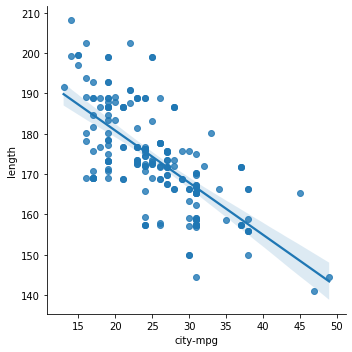

In [53]:
plt.rcParams['figure.figsize']=(15,15)
x = auto_mobile['city-mpg'].values
y = auto_mobile['num-of-cylinders'].values
ax4 = sns.lmplot(x ='city-mpg', y ='length',data=auto_mobile)

<a class="list-group-item list-group-item-action" data-toggle="list" href="#Notebook-Content" role="tab" aria-controls="settings">Go to top<span class="badge badge-primary badge-pill"></span></a> 


### Pair Plot

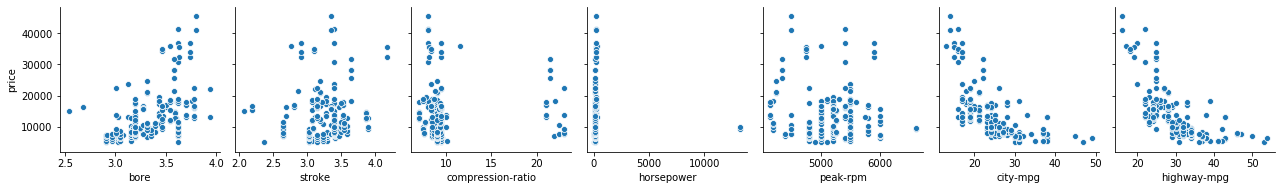

In [54]:
plt.rcParams['figure.figsize']=(20,10)
pp = sns.pairplot(data=auto_mobile,
                  y_vars=['price'],
                  x_vars=['bore', 'stroke','compression-ratio', 'horsepower', 'peak-rpm','city-mpg', 'highway-mpg'])

<a class="list-group-item list-group-item-action" data-toggle="list" href="#EDA" role="tab" aria-controls="settings">Go to top<span class="badge badge-primary badge-pill"></span></a> 


# Outlier Treatment
An outlier is an observation point that is distant from other observations. The boxplot and Scatter plot are two visualization tools that in most cases prove to be effective in outlier detection<br>
Outlier Treatment can be done by two methods that will be explained in detail  below: <br>
1. z score 
2. IQR 

### Z Score
The __Z-score__ is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured<br>
While calculating the Z-score we re-scale and centre the data and look for data points which are too far from zero. These data points which are way too far from zero will be treated as the outliers. In most of the cases a __threshold of 3 or -3__ is used i.e. if the Z-score value is greater than or less than 3 or -3 respectively, that data point will be identified as outliers.

In [55]:
from scipy import stats
import numpy as np
# how to calulate the z-score 
z = np.abs(stats.zscore(auto_mobile[['length','width','height','curb-weight']]))
print(z[0:10])

[[0.43167171 0.84629167 2.02401914 0.01902332]
 [0.43167171 0.84629167 2.02401914 0.01902332]
 [0.23668705 0.19360214 0.54649123 0.50853602]
 [0.20202844 0.13274263 0.23331516 0.42380522]
 [0.20202844 0.22598399 0.23331516 0.51045442]
 [0.25889897 0.17936331 0.25919414 0.09767762]
 [1.51005054 2.55701804 0.80790935 0.54882237]
 [1.51005054 2.55701804 0.80790935 0.75984611]
 [1.51005054 2.55701804 0.88999423 1.01307459]
 [0.33201822 0.9252942  0.710661   0.94976747]]


In [56]:
#The threashold is 3
threshold = 3
print(np.where(z > 3))

(array([], dtype=int64), array([], dtype=int64))


There are no data points with z>3 in our data. Hence we will Download the Boston Data set to show how outlier removal can be done 

In [57]:
from sklearn.datasets import load_boston
boston = load_boston()
x = boston.data
y = boston.target
columns = boston.feature_names
#create the dataframe
boston_df = pd.DataFrame(boston.data)
boston_df.columns = columns
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [58]:
#Finding the z score
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(boston_df))
print(z)

[[0.41978194 0.28482986 1.2879095  ... 1.45900038 0.44105193 1.0755623 ]
 [0.41733926 0.48772236 0.59338101 ... 0.30309415 0.44105193 0.49243937]
 [0.41734159 0.48772236 0.59338101 ... 0.30309415 0.39642699 1.2087274 ]
 ...
 [0.41344658 0.48772236 0.11573841 ... 1.17646583 0.44105193 0.98304761]
 [0.40776407 0.48772236 0.11573841 ... 1.17646583 0.4032249  0.86530163]
 [0.41500016 0.48772236 0.11573841 ... 1.17646583 0.44105193 0.66905833]]


In [59]:
#Finding the outliers
threshold = 3
print(np.where(z > 3))

(array([ 55,  56,  57, 102, 141, 142, 152, 154, 155, 160, 162, 163, 199,
       200, 201, 202, 203, 204, 208, 209, 210, 211, 212, 216, 218, 219,
       220, 221, 222, 225, 234, 236, 256, 257, 262, 269, 273, 274, 276,
       277, 282, 283, 283, 284, 347, 351, 352, 353, 353, 354, 355, 356,
       357, 358, 363, 364, 364, 365, 367, 369, 370, 372, 373, 374, 374,
       380, 398, 404, 405, 406, 410, 410, 411, 412, 412, 414, 414, 415,
       416, 418, 418, 419, 423, 424, 425, 426, 427, 427, 429, 431, 436,
       437, 438, 445, 450, 454, 455, 456, 457, 466], dtype=int64), array([ 1,  1,  1, 11, 12,  3,  3,  3,  3,  3,  3,  3,  1,  1,  1,  1,  1,
        1,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  5,  3,  3,  1,  5,
        5,  3,  3,  3,  3,  3,  3,  1,  3,  1,  1,  7,  7,  1,  7,  7,  7,
        3,  3,  3,  3,  3,  5,  5,  5,  3,  3,  3, 12,  5, 12,  0,  0,  0,
        0,  5,  0, 11, 11, 11, 12,  0, 12, 11, 11,  0, 11, 11, 11, 11, 11,
       11,  0, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11

Don’t be confused by the results. The first array contains the list of row numbers and second array respective column numbers, which mean z[55][1] have a Z-score higher than 1.

To remove or filter the outliers and get the clean data:

In [60]:
boston_df_zs = boston_df[(z < 3).all(axis=1)]

In [61]:
boston_df_zs.shape, boston_df.shape

((415, 13), (506, 13))

Hence we see the columns containing the outliers are removed

<a class="list-group-item list-group-item-action" data-toggle="list" href="#Notebook-Content" role="tab" aria-controls="settings">Go to top<span class="badge badge-primary badge-pill"></span></a> 


### IQR Score
The **interquartile range (IQR)**, also called the widespread  or middle 50%, or technically H-spread, is a measure of statistical dispersion, being equal to the difference between 75th and 25th percentiles, or between upper and lower quartiles, **IQR = Q3 − Q1**<br>

In other words, the IQR is the first quartile subtracted from the third quartile; these quartiles can be clearly seen on a box plot on the data<br>

It is a measure of the dispersion like standard deviation or variance, but is much more robust against outliers<br>

In [62]:
#Calculating the IQR
Q1 = boston_df.quantile(0.25)
Q3 = boston_df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

CRIM         3.595038
ZN          12.500000
INDUS       12.910000
CHAS         0.000000
NOX          0.175000
RM           0.738000
AGE         49.050000
DIS          3.088250
RAD         20.000000
TAX        387.000000
PTRATIO      2.800000
B           20.847500
LSTAT       10.005000
dtype: float64


• This is the IQR for each column in the dataframe<br>
• As we now have the IQR scores, we can to get hold on outliers. The below code will give an output with some true and false values. The data point where we have False that means these values are valid whereas True indicates presence of an outlier.

In [63]:
print(boston_df < (Q1 - 1.5 * IQR))or(boston_df > (Q3 + 1.5 * IQR))

      CRIM     ZN  INDUS   CHAS    NOX     RM    AGE    DIS    RAD    TAX  \
0    False  False  False  False  False  False  False  False  False  False   
1    False  False  False  False  False  False  False  False  False  False   
2    False  False  False  False  False  False  False  False  False  False   
3    False  False  False  False  False  False  False  False  False  False   
4    False  False  False  False  False  False  False  False  False  False   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
501  False  False  False  False  False  False  False  False  False  False   
502  False  False  False  False  False  False  False  False  False  False   
503  False  False  False  False  False  False  False  False  False  False   
504  False  False  False  False  False  False  False  False  False  False   
505  False  False  False  False  False  False  False  False  False  False   

     PTRATIO      B  LSTAT  
0      False  False  False  
1      False  Fal

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,False,False,False,False,False,False,False,False,False,False,False,False,False
502,False,False,False,False,False,False,False,False,False,False,False,False,False
503,False,False,False,False,False,False,False,False,False,False,False,False,False
504,False,False,False,False,False,False,False,False,False,False,False,False,False


Just like Z-score we can use previously calculated IQR score to filter out the outliers by keeping only valid values.

In [64]:
#Removing outliers
boston_df_iqr = boston_df[~((boston_df < (Q1 - 1.5 * IQR)) |(boston_df > (Q3 + 1.5 * IQR))).any(axis=1)]
boston_df_iqr.shape, boston_df.shape

((274, 13), (506, 13))

<a class="list-group-item list-group-item-action" data-toggle="list" href="#Notebook-Content" role="tab" aria-controls="settings">Go to top<span class="badge badge-primary badge-pill"></span></a> 
